# Diversification Limits
* Protects against specific risk, but not systemic
* Hedging is the only option but gives up on the upside as well the downside
* Insurance provides downside potential whilst allowing for upside. It is a form of dynamic hedging, as it should vary over time depending on the level of risk faced

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from my_modules import risk
from my_modules import data
from my_modules import portfolio

from scipy.optimize import minimize
import numpy as np
import pandas as pd

In [2]:
ind_return = data.get_ind30_vw_returns()

In [3]:
ind_nfirms = data.get_ind30_nfirms()
ind_size = data.get_ind30_size()

In [4]:
# Should have the same size
print (ind_return.shape == ind_nfirms.shape == ind_size.shape)

True


In [6]:
ind_mktcap = ind_nfirms * ind_size
ind_return.shape == ind_mktcap.shape

True

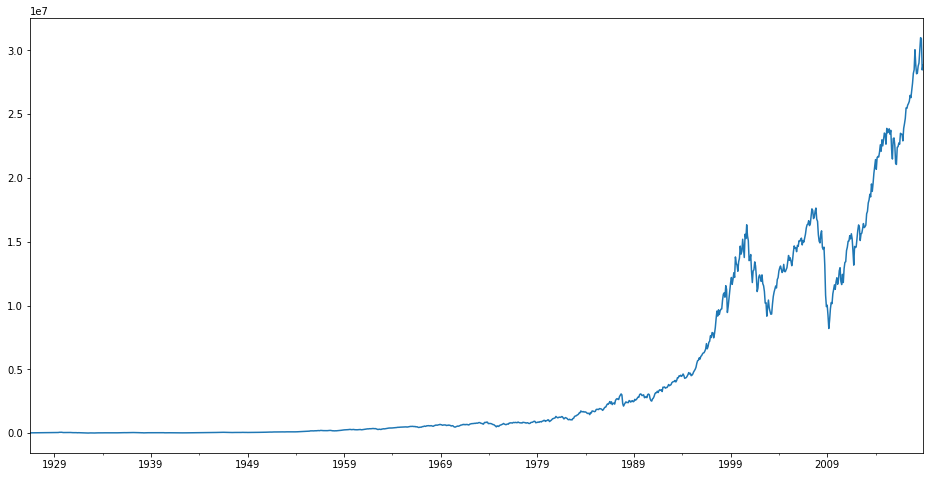

In [14]:
# We need to calculate the total on the rows, not the sum of the columns. 'axis across columns'
total_mktcap = ind_mktcap.sum(axis='columns')
total_mktcap.plot(figsize=(16,8))

In [15]:
# Weight of the industry as the total over time
ind_cap_weight = ind_mktcap.divide(total_mktcap, axis='rows')
ind_cap_weight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [16]:
# Should equal one
ind_cap_weight['1926'].sum(axis='columns')

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

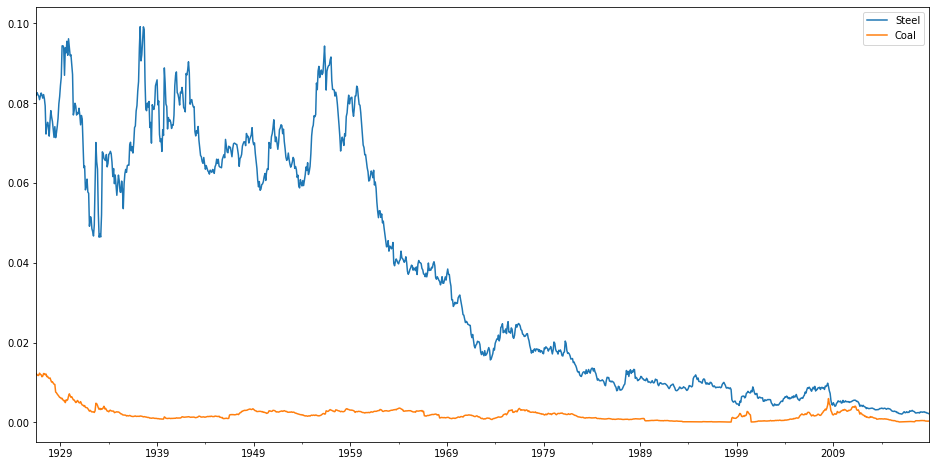

In [17]:
# Coal has consistently had a small cap weight whilst steel was of high importance until the 60s
ind_cap_weight[['Steel', 'Coal']].plot(figsize=(16,8))

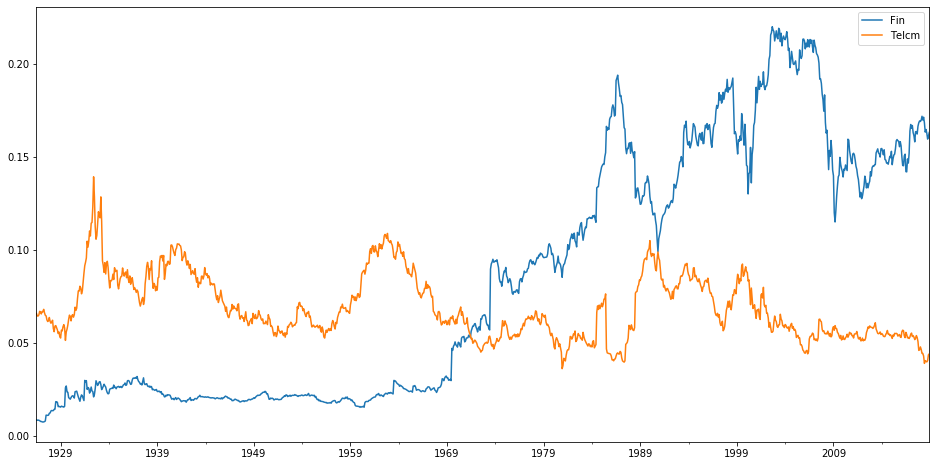

In [18]:
# The change in weighting of telecoms year to year has fallen, hanging around 5% 
# whilst finance starting in the 70s has increased substantially
ind_cap_weight[['Fin', 'Telcm']].plot(figsize=(16,8))

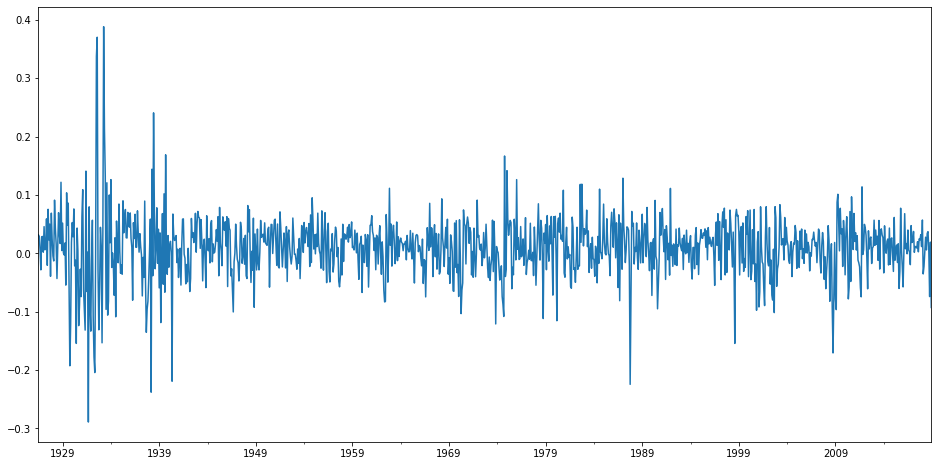

In [19]:
total_market_return = (ind_cap_weight * ind_return).sum(axis='columns')
total_market_return.plot(figsize=(16,8))

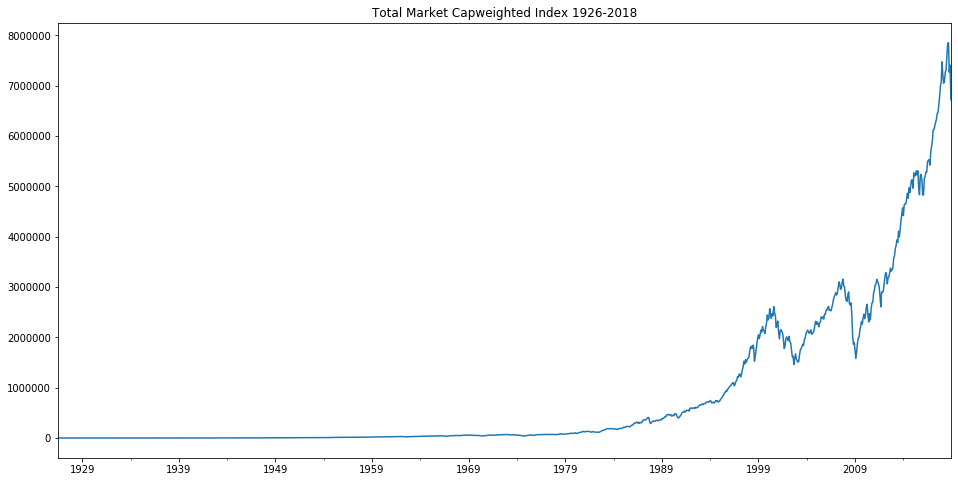

In [20]:
total_market_index = risk.drawdown(total_market_return).Wealth
total_market_index.plot(figsize=(16,8), title='Total Market Capweighted Index 1926-2018')

# How are returns related to market correlations ?

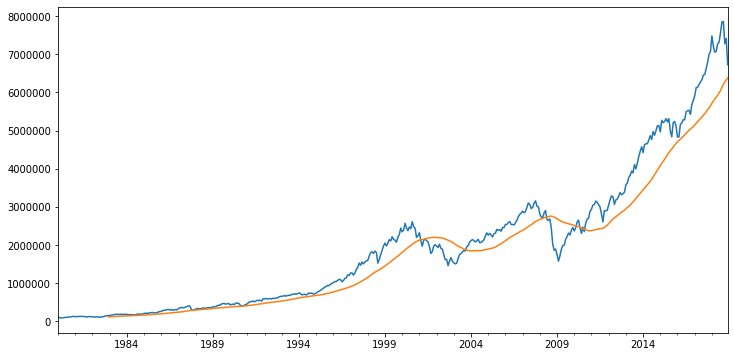

In [21]:
total_market_index['1980':].plot(figsize=(12,6))
#36 month rolling
total_market_index['1980':].rolling(window=36).mean().plot(figsize=(12,6))